In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import pandas as pd

In [19]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path= r'C:\Users\there.DESKTOP-CKI66IV\Documents\GitHub\Fencing-Pose-Classification\PD Python Integration\model 2.pt', force_reload=True)
model.max_det = 2
model.conf = 0.2


Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\there.DESKTOP-CKI66IV/.cache\torch\hub\master.zip
YOLOv5  2022-3-22 torch 1.10.2+cpu CPU

Fusing layers... 
Model Summary: 290 layers, 20856975 parameters, 0 gradients, 48.0 GFLOPs
Adding AutoShape... 


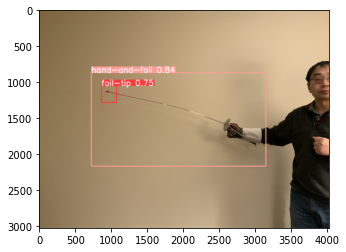

In [9]:
img = r"C:\Users\there.DESKTOP-CKI66IV\Documents\GitHub\Fencing-Pose-Classification\PD Python Integration\More yolo training\20220204_021749395_iOS.jpg"
results = model(img)

%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [4]:
results.print()

df_results = results.pandas().xyxy[0]
df_hand = df_results.loc[df_results['class'] == 1]
df_tip = df_results.loc[df_results['class'] == 0]
results.pandas().xyxy[0]


image 1/1: 3024x4032 1 foil-tip, 1 hand-and-foil
Speed: 169.6ms pre-process, 439.5ms inference, 15.9ms NMS per image at shape (1, 3, 480, 640)


,xmin,ymin,xmax,ymax,confidence,class,name
0,727.192017,869.796631,3154.873291,2166.781982,0.836895,1,hand-and-foil
1,868.505005,1051.630127,1077.155396,1283.159302,0.747194,0,foil-tip


In [5]:
df_tip = df_results.loc[df_results['class'] == 0]
df_tip.iloc[0]

xmin           868.505005
ymin          1051.630127
xmax          1077.155396
ymax          1283.159302
confidence       0.747194
class                   0
name             foil-tip
Name: 1, dtype: object

In [ ]:
 # if i_hand.empty:

    #     if not df_hand.empty:
    #         i_hand = df_hand.iloc[0]
    
    # if i_tip.empty:
    #     if not df_tip.empty:
    #          i_tip = df_tip.iloc[0]

    # if not (df_tip.empty and df_hand.empty):
    #     xmin = df_hand.loc[0,"xmax"]
    #     xmax = df_hand.loc[0,"xmax"]
    #     ymin = df_hand.loc[0,"ymin"]
    #     ymax = df_hand.loc[0,"ymax"]

    #     remove_rows = []
    #     for i in df_tip.index:
    #         x1 = df_tip.loc[i,"xmin"]
    #         y1 = df_tip.loc[i,"ymin"]
    #         x2 = df_tip.loc[i,"xmax"]
    #         y2 = df_tip.loc[i,"ymax"]

    #         center_x = (x1+x2)/2
    #         center_y =  (y1+y2)/2

    #         if (center_x < df_hand.loc[0,"xmin"] or center_x > df_hand.loc[0,"xmax"] or center_y < df_hand.loc[0,"ymin"] or center_y > df_hand.loc[0,"ymax"]):
    #             remove_rows.append(i)

    #     df_tip.drop(remove_rows)



In [6]:
def writeVelocityLine(master_position, i):
    temp = i-11
    while(temp < i):
        
        #WRITE VELOCITY LINE 
        if (master_position[temp] is not None and master_position[temp+1] is not None):   
            cv2.line(frame, tuple(master_position[temp]),tuple(master_position[temp+1]), (0,255,0), 4)

            # tuple(master_position[temp+1])
        temp+=1

In [15]:
# cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture(r"C:\Users\there.DESKTOP-CKI66IV\Documents\GitHub\Fencing-Pose-Classification\PD Python Integration\unprocessed.MOV")
i = 0
i_hand = pd.DataFrame()
i_tip = pd.DataFrame()
master_person = []

video_fps = cap.get(cv2.CAP_PROP_FPS),
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)

# # we are using x264 codec for mp4
# fourcc = cv2.VideoWriter_fourcc(*'X264')
# writer = cv2.VideoWriter('OUTPUT_PATH.mp4', apiPreference=0, fourcc=fourcc,
#                      fps=video_fps[0], frameSize=(int(width), int(height)))

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('1.avi', fourcc, video_fps[0], (int(width), int(height)))
while cap.isOpened():

        
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)


    # Results - parsing
    df_results = results.pandas().xyxy[0]
    # df_hand = df_results.loc[df_results['class'] == 1]
    
    df_tip = df_results.loc[df_results['class'] == 0]
    if not df_tip.empty:
        centers = []
        # for i in range(len(df_tip)):
            # if i > 11:



            #     temp = df_tip.iloc[i]
            #     x1 = temp.loc["xmin"]
            #     y1 = temp.loc["ymin"]
            #     x2 = temp.loc["xmax"]
            #     y2 = temp.loc["ymax"]
            #     center_x = (x1+x2)/2
            #     center_y =  (y1+y2)/2
            #     centers.append(int(center_x, int(center_y)))
        temp = df_tip.iloc[0]
        x1 = temp.loc["xmin"]
        y1 = temp.loc["ymin"]
        x2 = temp.loc["xmax"]
        y2 = temp.loc["ymax"]
        center_x = (x1+x2)/2
        center_y =  (y1+y2)/2
        # centers.append(int(center_x, int(center_y)))
        
        i_tip = [int(center_x), int(center_y)]
    else:
        i_tip = None
    

    master_person.append(i_tip)
    # if len(master_person) > 10:
    #         master_person = master_person[-10:]


    frame = np.squeeze(results.render())
    # if (i > 11):
    #     writeVelocityLine(master_person, i)
   

    
    cv2.imshow('YOLO', frame)
    out.write(frame)
    i+=1
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [ ]:
master_person
